# Exercise 01: Wine Dataset Assessment

I've copied the Exercise 00 notebook to get you started.

Work through the notebook, making the necessary changes to analyze the **wine** dataset ([here](https://scikit-learn.org/stable/datasets/toy_dataset.html))
and answer the questions.

## Installing Modules

In [1]:
import sys
!{sys.executable} -m pip install -U pip
!{sys.executable} -m pip install -U scikit-learn matplotlib seaborn pandas

## Loading and Assessing the Iris Dataset

Load the pre-canned iris dataset:

In [2]:
from sklearn import datasets
dataset = datasets.load_iris()

`dataset` has type `Bunch` [here](https://scikit-learn.org/stable/modules/generated/sklearn.utils.Bunch.html), which is essentially a fancy dictionary:

In [3]:
type(dataset)

sklearn.utils._bunch.Bunch

In [4]:
dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

The keys we're most interested in are `'data'`, `'target'`, `'target_names'`, and `'feature_names'`.

`'target_names'` contains the labels for each class:

In [5]:
dataset['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

and `'target'` contains the correct `'target_name'` **index** for each entry in `'data'`:

In [6]:
dataset['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

The `'data'` array can be quite large.  Each row is an example and each column is a feature for that example.  in this case, there are 150 examples, each with 4 features:

In [7]:
dataset['data'].shape

(150, 4)

In [8]:
dataset['data'][0]

array([5.1, 3.5, 1.4, 0.2])

What do these numbers mean?  The `'feature_names'` array tells us:

In [9]:
dataset['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

We can get a feel for the iris dataset by creating scatter plots from pairs of features.

Documentation of interest:
- [subplots](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html)
- [scatter](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html)
- [axis.set](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set.html)
- [axis.legend](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.legend.html)

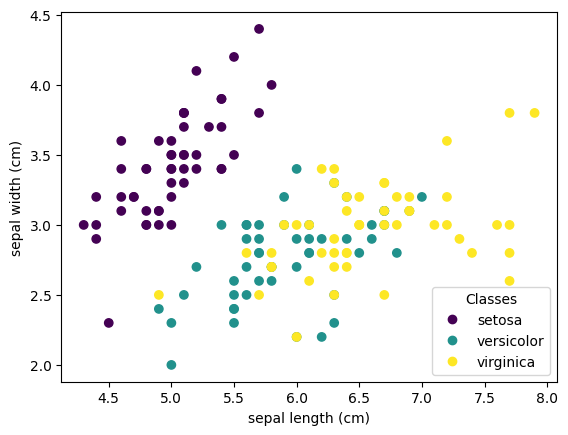

In [10]:
import matplotlib.pyplot as plt
from random import randrange

_, ax = plt.subplots()

scatter = ax.scatter(
    dataset.data[:, 0],
    dataset.data[:, 1],
    c=dataset.target
)

ax.set(
    xlabel=dataset.feature_names[0],
    ylabel=dataset.feature_names[1]
)

ax.legend(
    scatter.legend_elements()[0],
    dataset.target_names,
    loc="lower right",
    title="Classes"
);

Creating these plots manually can be tedious, so we'll use Seaborn `pairplot` to create every feature combo in one command.

First, we need to convert the `scikit-learn` dataset into a `pandas` dataframe.

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns

sns.set(style="ticks", color_codes=True)

df = pd.DataFrame(
    data=np.c_[dataset['data'], dataset['target']], # concatenate 'data' and 'target' values
    columns=dataset['feature_names'] + ['Type']  # concatenate 'feature_names' and "Species"
)

In [16]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Type
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


Next, we'll convert the numeric `'Species'` to strings by converting that column to "category" data and then mapping the values.

In [17]:
df['Type'] = df['Type'].astype('category')
df['Type'] = df['Type'].cat.rename_categories(dataset['target_names'])

Useful documentation:
* [pairplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html)

**NOTE: THIS CAN TAKE A WHILE TO RENDER!**

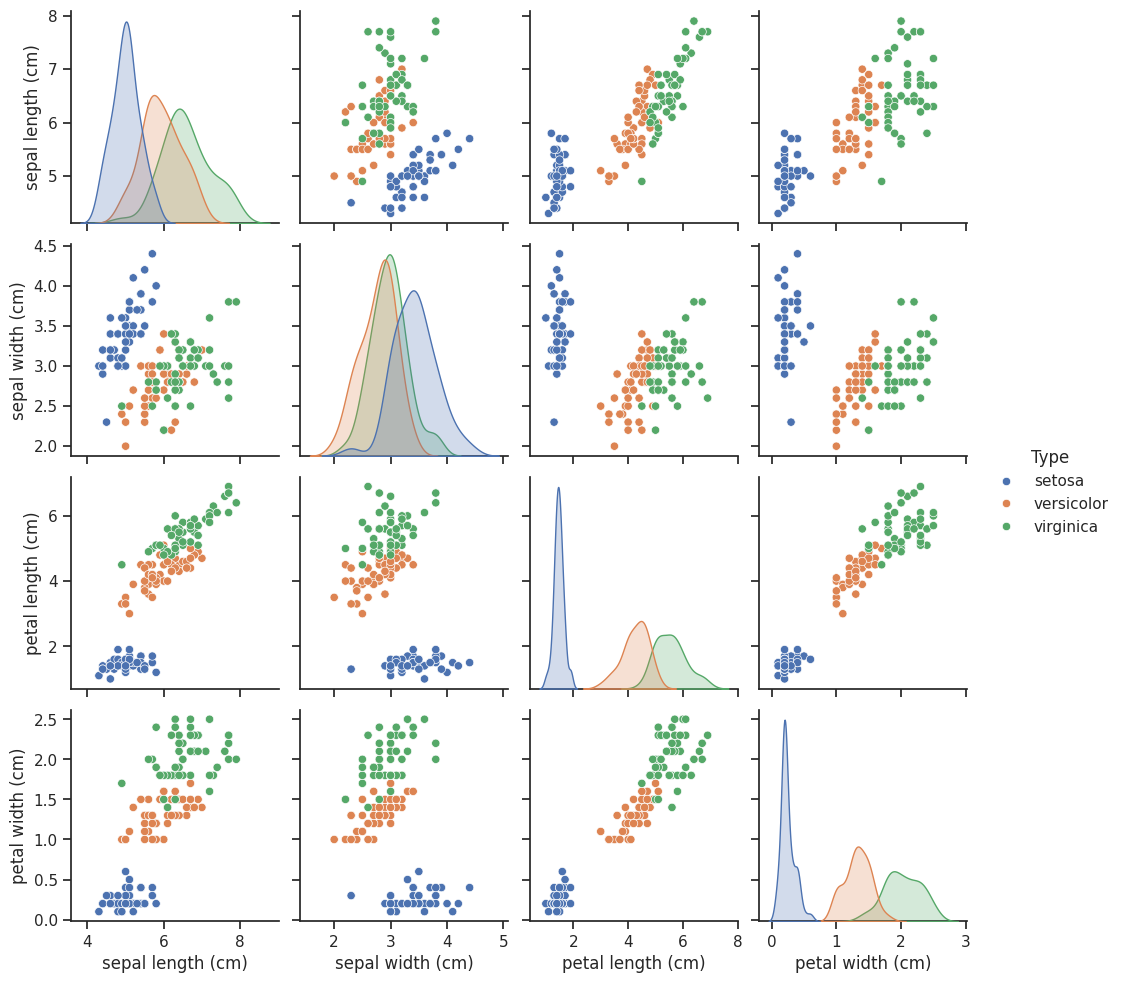

In [18]:
import seaborn as sns

g = sns.pairplot(
    df,
    hue="Type"
)

Based on the plots above, how well do you think ML models will perform?

YOUR ANSWER HERE

In [ ]:
I think that the ML models will not perform very well because there is a lot of overlap. Versicolor and Virginicia are often right on top of each other. Setosa might be easier to differentiate. 
